In [1]:
!git clone https://github.com/IHIaadj/text_summarization_project

Cloning into 'text_summarization_project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 5), reused 18 (delta 3), pack-reused 0
Receiving objects: 100% (22/22), 10.33 KiB | 1.15 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
%cd text_summarization_project

/content/text_summarization_project


# 📘 Welcome to the Arabic Text Summarization Project

## Overview
Welcome, students 👩‍🎓👨‍🎓, to our exciting journey into the world of Natural Language Processing (NLP)! In this project, we'll be delving into the fascinating task of text summarization with a focus on the Arabic language 📚. Our goal is to develop a model that can efficiently summarize Arabic text, making it easier to grasp the essence of large documents quickly 🚀.

## Project Objectives
- **Understanding Text Summarization**: Learn the fundamentals of how text summarization works 📝.
- **Exploring NLP Models**: Get hands-on experience with advanced NLP models like AraGPT2 🤖.
- **Model Fine-Tuning and Training**: Discover how to fine-tune pre-trained models on a custom dataset for specific tasks like summarization 🧠.
- **Practical Application**: Apply your knowledge to build a model that can summarize Arabic texts 🌐.

## Dataset
We'll be using a custom dataset of Arabic texts and their summaries 📖. This dataset will allow us to train our model to understand and generate concise summaries.

We generated this dataset using ChatGPT 😜
If you've read this sentence, send me a message.




## ⚠️ **Important: Use GPU Runtime** ⚠️

To ensure this notebook functions correctly and efficiently, it is **crucial to use a GPU runtime**. Follow these steps to enable GPU acceleration:

1. **Open Runtime settings**: At the top of the page, click on `Runtime` in the menu bar. 🔄

2. **Change the runtime type**: In the dropdown menu, select `Change runtime type`. 🛠️

3. **Select GPU as the hardware accelerator**: In the dialog that appears, under `Hardware accelerator`, choose `GPU T4` from the dropdown menu. 🖥️

4. **Save the settings**: Click `Save` to apply the changes. 💾

By enabling GPU, the computations in this notebook will be significantly faster, especially for tasks like training neural networks, processing large datasets, or performing complex calculations.


[link text](https://)## PART1: Load AraGPT2

Using the link below, learn how to load araGPT2 base model.

https://huggingface.co/aubmindlab/aragpt2-base

In [3]:
!pip install arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=5599f9bbb49b9be1f392333480fe0eea2cc4d2deb845002afd4a908312f023b7
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
Successfully built emoji


In [4]:
from transformers import GPT2TokenizerFast, pipeline
from transformers import GPT2LMHeadModel
from arabert.aragpt2.grover.modeling_gpt2 import GPT2LMHeadModel
from arabert.preprocess import ArabertPreprocessor

In [6]:
#TODO: Complete this cell
MODEL_NAME='aubmindlab/aragpt2-base'
arabert_prep = ArabertPreprocessor(model_name=MODEL_NAME)

text="الجزائر بلد"
text_clean = arabert_prep.preprocess(text)

model = GPT2LMHeadModel.from_pretrained(MODEL_NAME)
tokenizer = GPT2TokenizerFast.from_pretrained(MODEL_NAME)
generation_pipeline = pipeline("text-generation",model=model,tokenizer=tokenizer)

#feel free to try different decoding settings
generation_pipeline(text,
    pad_token_id=tokenizer.eos_token_id,
    num_beams=10,
    max_length=200,
    top_p=0.9,
    repetition_penalty = 3.0,
    no_repeat_ngram_size = 3)[0]['generated_text']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/aragpt2-base were not used when initializing GPT2LMHeadModel: ['ln_f.weight', 'ln_f.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at aubmindlab/aragpt2-base and are newly initialized: ['emb_norm.weight', 'emb_norm.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.52M [00:00<?, ?B/s]

KeyboardInterrupt: 

### Print AraGPT Model and analyze the architecture

In [ ]:
Sentence: This is a dog
Word Embeddings: [1, 2] [3, 4] [5, 6] [7, 8]
Positional: [0, 0] [1, 1] [2, 2] [3, 3]


Output: [0, 0, 0, 0.1, 0.4, 0.5, 0, 0]  ==== 1

In [7]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(64000, 768)
    (wpe): Embedding(1024, 768)
    (emb_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (lm_head): Linear(in_features=768, out_features=64000, bias=False)
)

# TODO: print AraGPT2

## PART2: Fine-tuning

To fine-tune AraGPT2 for text summarization, we use the file `arabic_texts_summaries.csv`

#### *Fine-tuning Steps:*


1.   Load datasets and split it into train/test
2.   Create Datalaoders of train and val.
3.   Resize model embeddings for new tokenizer length.
4.   Fine-tuning model by passing train data and evaluating it on val data during training.
5.   Store the tokenizer and fine-tuned model.
6.   Generate summaries for test set which is not used during fine tune.



In [74]:
from src.utils_data import *
from src.utils_tokenizer import *


In [59]:
from src.utils_data import *


In [60]:
max_length = 53
sum_length = 10
split_probability = 0.2

In [61]:
train, val, test = process_data("data/arabic_texts_summaries.csv",max_length , sum_length, split_probability)

train size: 40
val size: 5
test size: 5
test head:
                                                 text  \
45  تدور أحداث هذا النص حول مهرجان ثقافي. يبدأ الن...   

                                            summary  text_len  
45  الاحتفال بمهرجان ثقافي يعرض فنون وثقافات متنوعة        46  


<Axes: >

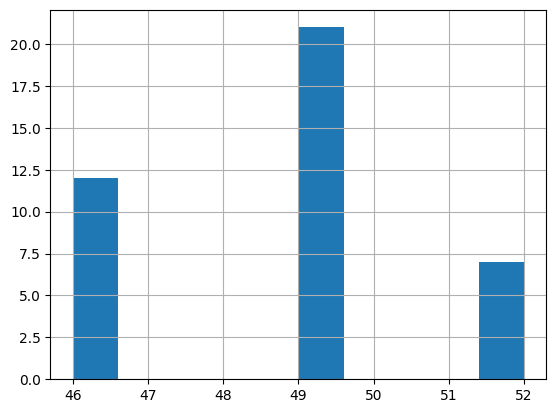

In [62]:
train["text_len"].hist()

In [63]:
# Add token to AraGPT2 tokenizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('aubmindlab/aragpt2-base')

special_tokens = {'bos_token':'<BOS>', 'eos_token':'<EOS>', 'pad_token':'<PAD>', 'additional_special_tokens':['<SUMMARIZE>']}
tokenizer.add_special_tokens(special_tokens)

print('tokenizer len: {}'.format(len(tokenizer)))

ignore_idx = tokenizer.pad_token_id


tokenizer len: 64004


In [64]:
# TODO: apply tokenizer
import os
from src.utils_tokenizer import *
tokenizer_dir ="tokenizer_path_save"
if not os.path.exists(tokenizer_dir):
  os.makedirs(tokenizer_dir) # Create output directory if needed

max_seq_len = 768
tokenizer.save_pretrained(tokenizer_dir)
tokenizer_len = len(tokenizer)
print('ignore_index: {}'.format(ignore_idx))
print('max_len: {}'.format(max_seq_len))

train, val, test = tokenize_dataset(tokenizer, train, val, test, max_seq_len)# Fix tokenize_dataset function in utils_tokenizer and call it


ignore_index: 64002
max_len: 768


In [65]:
#Generate train/val/test files
#save tokenized data
out_dir="tokenizer_data"
processed_set= "dataset"
data_dir = os.path.join(out_dir, processed_set)
if not os.path.exists(data_dir):
  os.makedirs(data_dir) # Create output directory if needed
file = os.path.join(data_dir,"train.csv")
train.to_csv(file, index=False)

file = os.path.join(data_dir,"val.csv")
val.to_csv(file, index=False)

file = os.path.join(data_dir,"test.csv")
test.to_csv(file, index=False)

In [66]:
# TODO: Visualize train and explain each column
train.head()

,text_len,encodings
37,46,"[input_ids, attention_mask]"
40,52,"[input_ids, attention_mask]"
31,49,"[input_ids, attention_mask]"
49,49,"[input_ids, attention_mask]"
21,46,"[input_ids, attention_mask]"


In [69]:
len(train_dataset)

40

In [70]:
# TODO: Data Loaders
# Fix code in utils_data.py

import torch
train_dataset, val_dataset= get_gpt2_dataset(train, val) # call function get_gpt2_dataset

#b = train_dataset.__getitem__(5) # check one data row

train_dataloader = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = 1)
val_dataloader = DataLoader(val_dataset, sampler = SequentialSampler(val_dataset), batch_size = 1)

train_loader_len = len(train_dataloader)

In [ ]:
b = [[[], [], []], [4, 5, 6]]
b[...,  1]

In [ ]:
a = [
    [
        []
        []
        []
    ],
    [
        []
        []
        [20, 21]
    ]
]

a[...,:]


In [77]:
from src.train import *

config = {
    "out_dir" :"output_dir",
    "training_models":"models_dir",
    "final_model":"AraGPT_Limitless",
}

# fine tune pretrained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_dir =  'aubmindlab/aragpt2-base'

train = Train(device, model_dir, tokenizer_len, ignore_idx, train_loader_len, config)
train.train_model(train_dataloader, val_dataloader)


AttributeError: 'dict' object has no attribute 'out_dir'

In [78]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   src/train.py
	modified:   src/utils_data.py
	modified:   src/utils_tokenizer.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	src/__pycache__/
	tokenizer_data/
	tokenizer_path_save/

no changes added to commit (use "git add" and/or "git commit -a")


In [79]:
!git add *

In [80]:
!git commit -m "add project files"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@db667f29b04b.(none)')


In [82]:
!git config --global user.email "fh_benmeziane@esi.dz"

In [83]:
!git config --global user.name "IHIaadj"

In [84]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address
